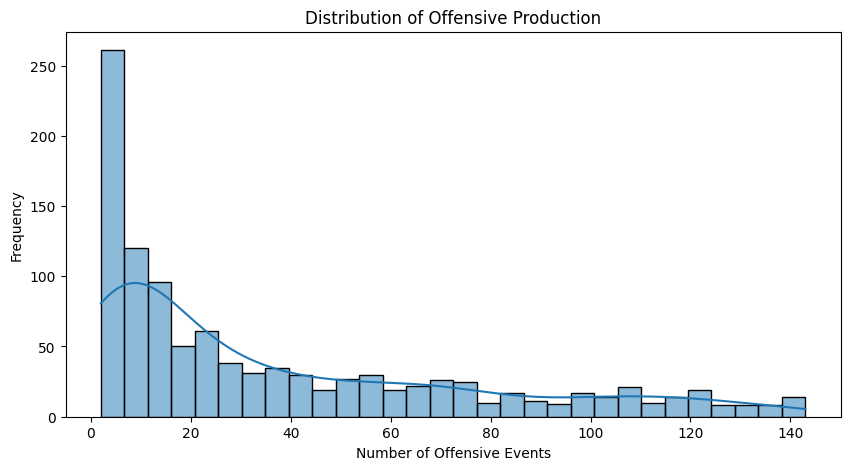

np.float64(37.535514018691586)

np.float64(38.42471227043545)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sportypy

player_data = pd.read_pickle("pickled_data/player_info")
plays_data = pd.read_pickle("pickled_data/game_plays")
plays_players_data = pd.read_pickle("pickled_data/game_plays_players")
player_info = pd.read_pickle("pickled_data/player_info")

player_info['birthDate'] = pd.to_datetime(player_info['birthDate'], errors='coerce')

merged_df = plays_data.merge(plays_players_data, on='play_id', how='left')
merged_df = merged_df.merge(player_info, left_on='player_id', right_on='player_id', how='left')
current_year = 2020
merged_df = merged_df[(current_year - merged_df['birthDate'].dt.year >= 20) & (current_year - merged_df['birthDate'].dt.year <= 35)]

scoring_plays = ['Goal', 'Assist']
defensive_plays = ['Blocked Shot', 'Takeaway', 'Goal', 'Assist']

offensive_df = merged_df[merged_df['event'].isin(scoring_plays)]
defensive_df = merged_df[merged_df['event'].isin(defensive_plays)]

offensive_stats = offensive_df.groupby('player_id').size().reset_index(name='offensive_events')
defensive_stats = defensive_df.groupby('player_id').size().reset_index(name='defensive_events')

offensive_stats = offensive_stats.merge(player_info, on='player_id', how='left')
defensive_stats = defensive_stats.merge(player_info, on='player_id', how='left')

low_offensive, high_offensive = offensive_stats['offensive_events'].quantile([0.10, 0.75])
low_defensive, high_defensive = defensive_stats['defensive_events'].quantile([0.10, 0.75])

offensive_stats = offensive_stats[(offensive_stats['offensive_events'] >= low_offensive) & (offensive_stats['offensive_events'] <= high_offensive)]
defensive_stats = defensive_stats[(defensive_stats['defensive_events'] >= low_defensive) & (defensive_stats['defensive_events'] <= high_defensive)]

plt.figure(figsize=(10,5))
sns.histplot(offensive_stats['offensive_events'], bins = 30, kde = True)
plt.title("Distribution of Offensive Production")
plt.xlabel("Number of Offensive Events")
plt.ylabel("Frequency")
plt.show()

offensive_mean = offensive_stats['offensive_events'].mean()
offensive_std = offensive_stats['offensive_events'].std()
league_avg_offensive = offensive_stats[(offensive_stats['offensive_events'] <= offensive_mean + offensive_std) & (offensive_stats['offensive_events'] >= offensive_mean)]

defensive_mean = defensive_stats['defensive_events'].mean()
defensive_std = defensive_stats['defensive_events'].std()
league_avg_defensive = defensive_stats[(defensive_stats['defensive_events'] <= defensive_mean + defensive_std) & (defensive_stats['defensive_events'] >= defensive_mean + defensive_std)]

display(offensive_mean)
display(offensive_std)

